In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("passengers.csv")
print(df.head())

   Year    Month            Airline  Passengers
0  2018  January         Aeromexico        3048
1  2018  January    Alaska Airlines       25704
2  2018  January  American Airlines       68271
3  2018  January     China Airlines           0
4  2018  January    Delta Air Lines       13904


In [5]:
categories = {
    'Southwest Airlines': 'Domestic',
    'Delta Air Lines': 'Domestic',
    'United Airlines': 'Domestic',
    'American Airlines': 'Domestic',
    'Alaska Airlines': 'Domestic',
    'Frontier Airlines': 'Domestic',
    'JetBlue Airways': 'Domestic',
    'Spirit Airlines': 'Domestic',
    'Hawaiian Airlines': 'Domestic',
    'Volaris': 'International',
    'Aeromexico': 'International',
    'China Airlines': 'International',
    'All Others': 'Other'
}

# Map airlines to categories
df['Category'] = df['Airline'].map(categories)

# Replace any missing with 'Unknown'
df['Category'] = df['Category'].fillna('Unknown')

print(df[['Airline', 'Category']].head(10))

              Airline       Category
0          Aeromexico  International
1     Alaska Airlines       Domestic
2   American Airlines       Domestic
3      China Airlines  International
4     Delta Air Lines       Domestic
5   Frontier Airlines       Domestic
6  Southwest Airlines       Domestic
7     United Airlines       Domestic
8             Volaris  International
9          All Others          Other


In [6]:
df.head()

,Year,Month,Airline,Passengers,Category
0,2018,January,Aeromexico,3048,International
1,2018,January,Alaska Airlines,25704,Domestic
2,2018,January,American Airlines,68271,Domestic
3,2018,January,China Airlines,0,International
4,2018,January,Delta Air Lines,13904,Domestic


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1122 non-null   int64 
 1   Month       1122 non-null   object
 2   Airline     1122 non-null   object
 3   Passengers  1122 non-null   int64 
 4   Category    1122 non-null   object
dtypes: int64(2), object(3)
memory usage: 44.0+ KB


In [8]:
# Try converting Month to numeric (if it’s already a number stored as string)
df['Month_num'] = pd.to_numeric(df['Month'], errors='coerce')

# If Month is text like "Jan" or "January", map it to numbers
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12,
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'June': 6, 'July': 7, 'August': 8, 'September': 9,
    'October': 10, 'November': 11, 'December': 12
}

# Only map the ones that didn’t convert to numeric
df.loc[df['Month_num'].isna(), 'Month_num'] = df['Month'].map(month_mapping)

In [9]:
# Create a proper datetime column
df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month_num'], day=1))

# Sort by date
df = df.sort_values('Date')

print(df.head())

   Year    Month            Airline  Passengers       Category  Month_num  \
0  2018  January         Aeromexico        3048  International        1.0   
1  2018  January    Alaska Airlines       25704       Domestic        1.0   
2  2018  January  American Airlines       68271       Domestic        1.0   
3  2018  January     China Airlines           0  International        1.0   
4  2018  January    Delta Air Lines       13904       Domestic        1.0   

        Date  
0 2018-01-01  
1 2018-01-01  
2 2018-01-01  
3 2018-01-01  
4 2018-01-01  


In [10]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [11]:
df.head()

,Year,Month,Airline,Passengers,Category,Month_num,Date
0,2018,January,Aeromexico,3048,International,1.0,2018-01-01
1,2018,January,Alaska Airlines,25704,Domestic,1.0,2018-01-01
2,2018,January,American Airlines,68271,Domestic,1.0,2018-01-01
3,2018,January,China Airlines,0,International,1.0,2018-01-01
4,2018,January,Delta Air Lines,13904,Domestic,1.0,2018-01-01


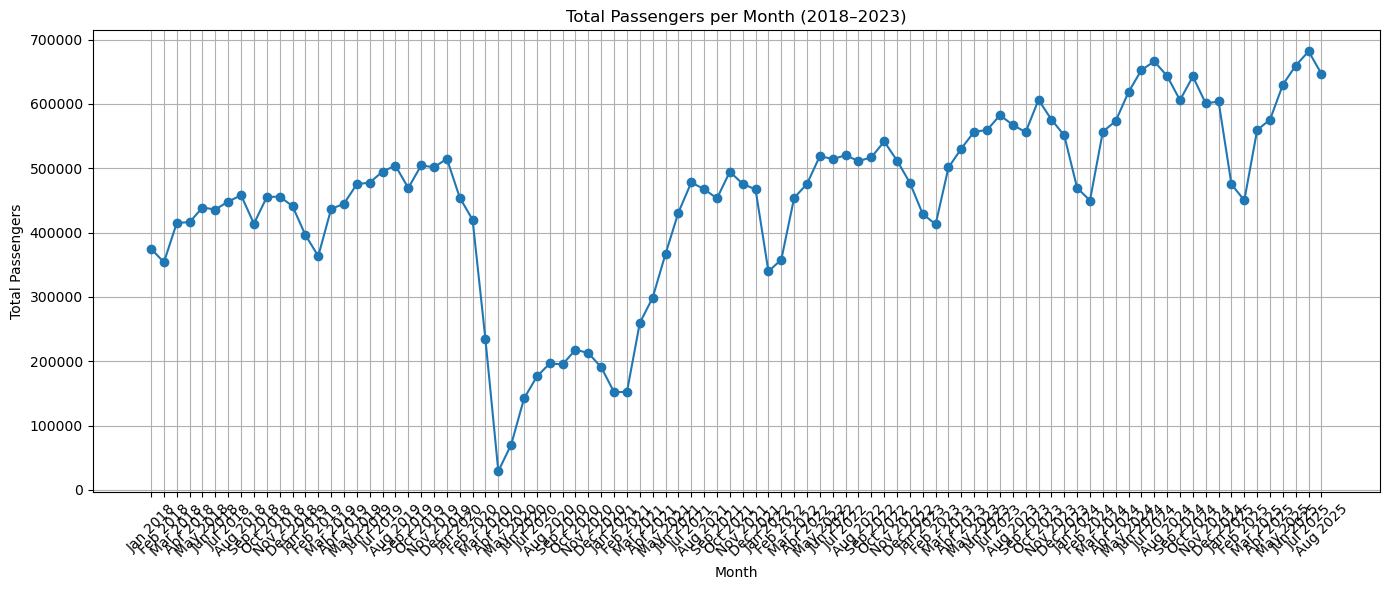

In [12]:
monthly_totals = df.groupby(["Year", "Month"])["Passengers"].sum().reset_index()

# Ensure months are in the right order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
monthly_totals["Month"] = pd.Categorical(monthly_totals["Month"], categories=month_order, ordered=True)
monthly_totals = monthly_totals.sort_values(["Year", "Month"])

# Create short labels for the x-axis (e.g., Jan 2018)
monthly_totals["Label"] = monthly_totals["Month"].str[:3] + " " + monthly_totals["Year"].astype(str)

# Plot the data
plt.figure(figsize=(14, 6))
plt.plot(monthly_totals["Label"], monthly_totals["Passengers"], marker='o')
plt.title("Total Passengers per Month (2018–2023)")
plt.xlabel("Month")
plt.ylabel("Total Passengers")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Airline
Southwest Airlines      17388080
American Airlines        6980219
Delta Air Lines          3897297
Frontier Airlines        3893436
Alaska Airlines          3250037
United Airlines          3002991
Volaris                   963209
China Airlines            923745
JetBlue                   524216
Hawaiian Airlines         510247
Avianca                   216649
All Others                 37029
Starlux Airlines           23242
Volaris El Salvador        19943
New Pacific Airlines        7418
Avelo Airlines              6046
aha!                        5646
New Pacific                 4740
Northern Pacific            3909
Aeromexico                  3048
Name: Passengers, dtype: int64


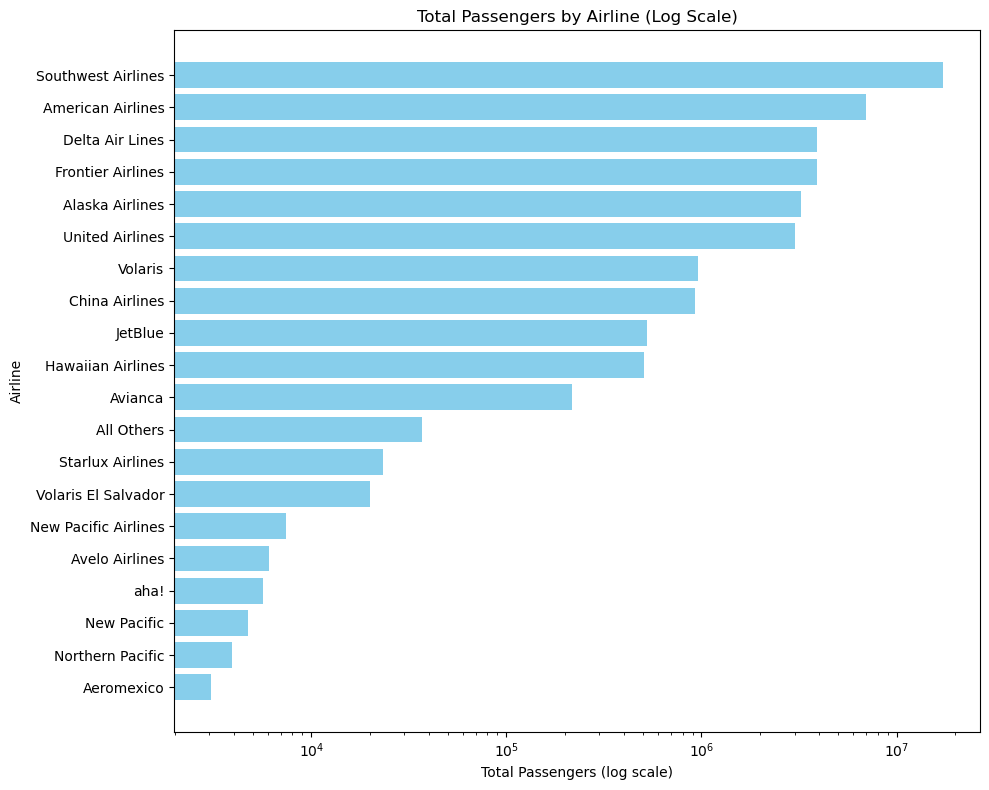

In [18]:
# show which airlines bring in the most passengers
# airlines with more flights are more likely to create higher parking demand around their gates/terminals

airline_totals = df.groupby("Airline")["Passengers"].sum().sort_values(ascending=False)

print(airline_totals)

plt.figure(figsize=(10, 8))
plt.barh(airline_totals.index, airline_totals.values, color="skyblue")
plt.xscale("log")
plt.title("Total Passengers by Airline (Log Scale)")
plt.xlabel("Total Passengers (log scale)")
plt.ylabel("Airline")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

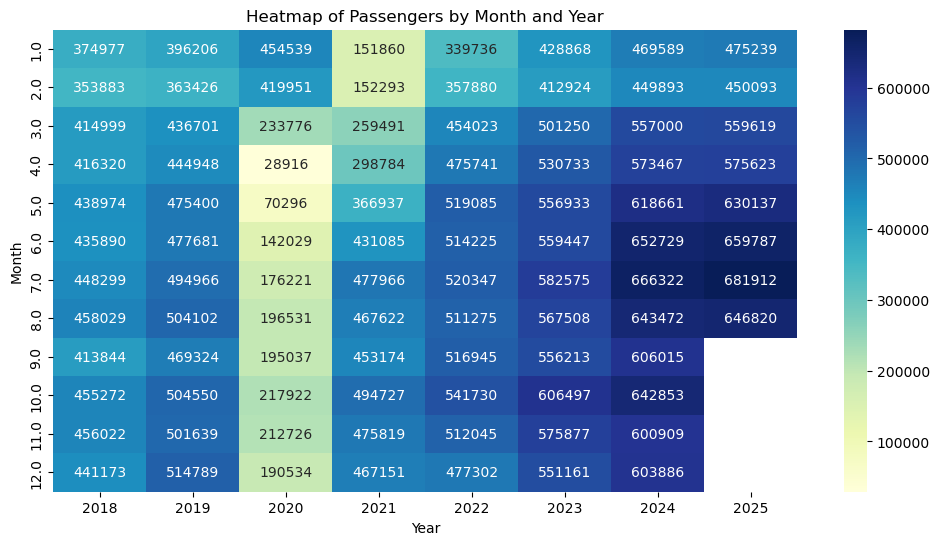

In [47]:
pivot = df.pivot_table(index='Month_num', columns='Year', values='Passengers', aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Passengers by Month and Year')
plt.ylabel('Month')
plt.show()

In [19]:
print(df["Year"].unique())
print(df["Year"].dtype)

[2018 2019 2020 2021 2022 2023 2024 2025]
int64


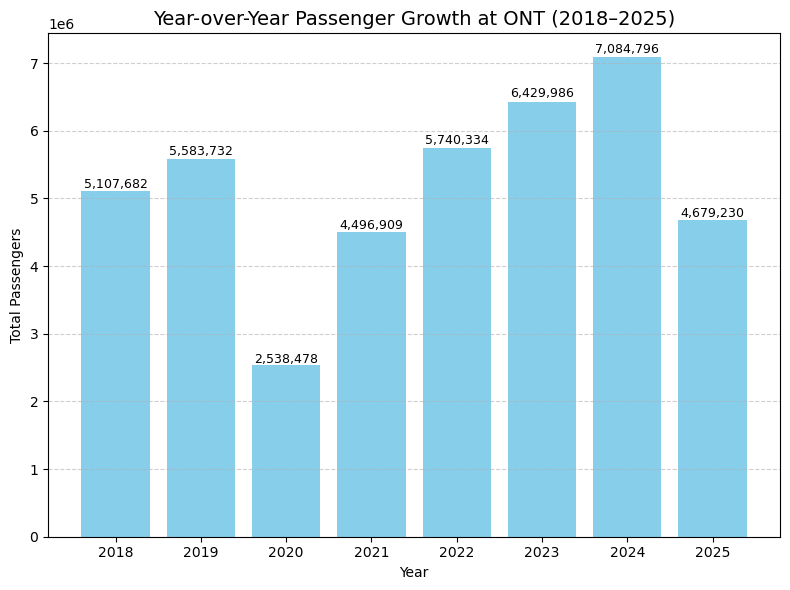

In [21]:
# Group total passengers by year
yearly_totals = df.groupby("Year")["Passengers"].sum().sort_index()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(yearly_totals.index, yearly_totals.values, color="skyblue")

# Add titles and labels
plt.title("Year-over-Year Passenger Growth at ONT (2018–2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Passengers")

# Add value labels on top of bars
for i, v in enumerate(yearly_totals.values):
    plt.text(yearly_totals.index[i], v + (v * 0.01), f"{v:,.0f}", 
             ha='center', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [22]:
monthly_totals.tail(20)

,Year,Month,Passengers,Label
76,2024,January,469589,Jan 2024
75,2024,February,449893,Feb 2024
79,2024,March,557000,Mar 2024
72,2024,April,573467,Apr 2024
80,2024,May,618661,May 2024
78,2024,June,652729,Jun 2024
77,2024,July,666322,Jul 2024
73,2024,August,643472,Aug 2024
83,2024,September,606015,Sep 2024
82,2024,October,642853,Oct 2024
